# Simple Autoencoder Network Model

## Train for 5 epochs

Observe the loss decreasing while training.

In [1]:
%%capture
!python SimpleAutoEncoder.py --max_epochs=5

## Inspect logs
⚠️ Make sure to **Stop** the cell execution after observing the logs


In [14]:
!tensorboard --logdir=./lightning_logs

^C


## Load trained model
Checkpoints are saved incrementally for each training session under `./lightning_logs/version_X`.

In [12]:
__import__("sys").path.append("..")
import utils
from SimpleAutoEncoder import SimpleAutoEncoder

model = utils.load_trained_model_for_evaluation(SimpleAutoEncoder, 0)
print(model)

SimpleAutoEncoder(
  (encoder): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU(inplace=True)
    (5): Linear(in_features=64, out_features=12, bias=True)
    (6): ReLU(inplace=True)
    (7): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Tanh()
  )
)


## Generate similar MNIST images

     Original image <----> Generated Image


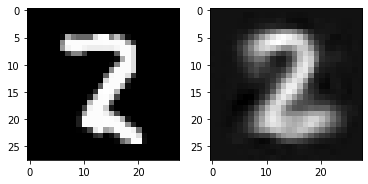

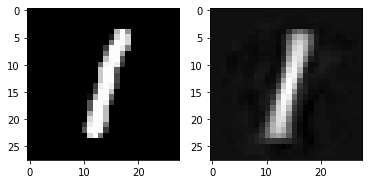

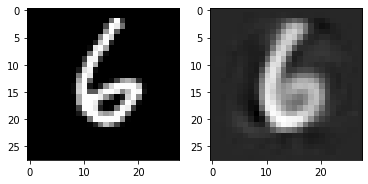

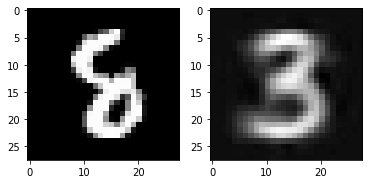

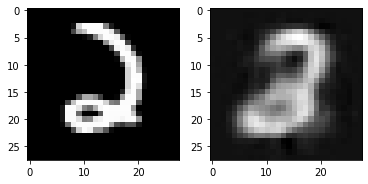

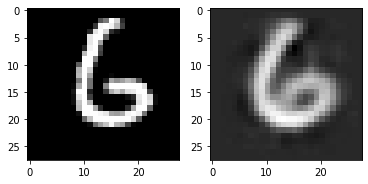

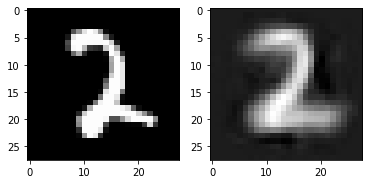

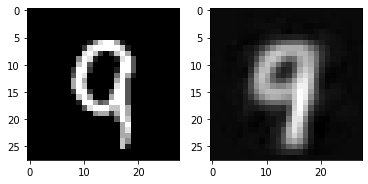

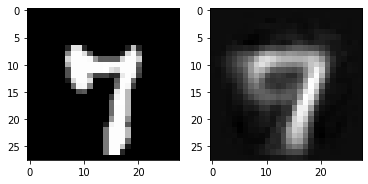

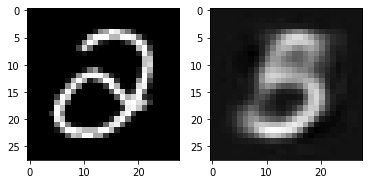

In [13]:
import torch
import random

test_len = model.mnist_test.data.shape[0]

print("     Original image <----> Generated Image")

for i in range(0, 10):
    orig_img, _ = model.mnist_test[random.randint(0, test_len)]
    orig_img = orig_img.view(1, 1, 28, 28)
    predicted_img = model(orig_img).detach()
    utils.plot_images([orig_img.view(28, 28), predicted_img.view(28, 28)])